In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [25]:
from sklearn.preprocessing import QuantileTransformer

In [3]:
import sys
sys.path.append(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code")
from SL_evaluations import *

In [4]:
df = pd.read_csv(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code\done_data.csv")
df.loc[:, 'target_return'] = df.groupby('tic')['adjcp'].apply(lambda x: x.pct_change().shift(-1))
df.dropna(inplace = True)

In [5]:
features = ['macd', 'rsi', 'cci', 'adx']
# features = ['macd']
target = ['target_return']

In [28]:
X = df[features].values
X = QuantileTransformer(output_distribution = 'normal').fit_transform(X)
y = df[target].values * 100

0.0001
0.001
0.01
0.0001
0.001
0.01
0.0001
0.001
0.01
Wall time: 28min 46s


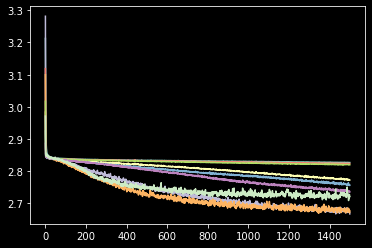

In [29]:
%%time
list_results = []
for batch_size in [2**13, 2**12, 2**11]:
    for learning_rate in [1e-4, 1e-3, 1e-2]:
        print(learning_rate)
        fit_params = {'epochs': 1500, 'batch_size': batch_size, 'verbose': 0}
        optimizer_params = {'loss': 'mse', 'optimizer': Adam(learning_rate = learning_rate)}
        
        results = eval_model(X, y,
                             fit_params = fit_params,
                             optimizer_params = optimizer_params)
        results['batch_size'] = [batch_size]
        results['learning_rate'] = [learning_rate]
        
        results = pd.DataFrame(results)
        list_results.append(results)

In [30]:
metric = 'correlation'
parameters = ['learning_rate', 'batch_size']

In [31]:
df_results = pd.concat(list_results)

In [32]:
df_pivot = df_results.pivot(parameters[0], parameters[1], metric)

<AxesSubplot:xlabel='batch_size', ylabel='learning_rate'>

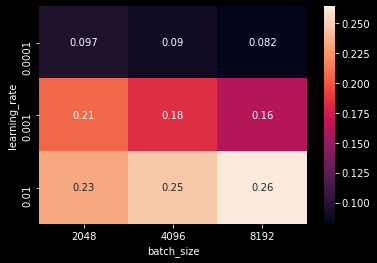

In [33]:
sns.heatmap(df_pivot, annot = True)